# **Seoul Bike Sharing Demand Data Set : exploratory analysis**

## Objectives

With this notebook we start the exploration of Seoul Bike Sharing Demand Data Set obtained via UCI Machine Learning Reposity, a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms. Those data were used for research purposes and published by Sathishkumar V E [1.2] 

Below we provide our exploratory analysis.

## Importing Needed packages

In [30]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

## Understanding the Data

#### `SeoulBikeData.csv`:

The dataset, **`SeoulBikeData.csv`**, which contains Seoul's rental bike data made available. [Dataset source](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand)

- **Date**: year-month-day
- **Rented Bike count** - Count of bikes rented at each hour
- **Hour** - Hour of he day
- **Temperature**-Temperature in Celsius
- **Humidity** - %
- **Windspeed** - m/s
- **Visibility** - 20m
- **Dew point temperature** - Celsius
- **Solar radiation** - MJ/m2
- **Rainfall** - mm
- **Snowfall** - cm
- **Seasons** - Winter, Spring, Summer, Autumn
- **Holiday** - Holiday/No holiday
- **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

**No missing values**

This dataset presents one year acquisition that spans from December 2017 to November 2018. The dataset provides the count of the rental bikes at each hour, for each day during that one-year span. Several features are present such as date/time variable. Temperature, humidity, wind speed, dew point temperature, solar radiation, rainfall, and snowfall are also present as climatic condition can greatly influence transportation in general. Holiday status and functioning days are also present. Other features such as seasons, holiday and functioning days are present too.

Those features will allow us to understand more the bike-sharing demand and the feature’s influence on it.

In [31]:
df = pd.read_csv('SeoulBikeData.csv')
df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [32]:
df.shape

(8760, 14)

In [33]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [73]:
df.rename(columns = {'Temperature(�C)':'Temperature (°C)', 'Dew point temperature(�C)':'Dew point temperature (°C)'}, inplace = True)
df.head(2)

,Date,Rented Bike Count,Hour,Temperature (°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature (°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday


For this data exploration, data are displayed as boxplot. 
A boxplot is a standardized way of displaying the dataset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.
Each group has 25% of data. The sample median represents the midpoint of the data, and it is represented by the line, which divides the box into two parts. The box itself denotes the 50% of middle values for each considered data field. This range of values from the first to third quartile limit is known as inner quartile range. Seventy-five percent of values fall below the third quartile and 25% falls above it. And the values above the upper whisker are considered as outliers.

Several boxplots of rental bike count across four seasons, hours of the day, working day, day of the week and week status will be displayed.

## Rented bike count

Text(0.5, 1.0, 'Rented bike count')

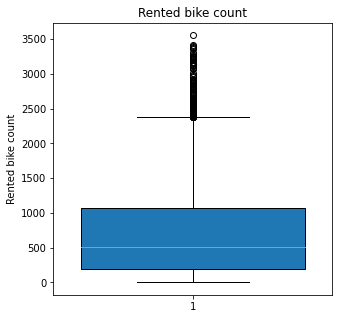

In [53]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize = (5,5))
ax1.boxplot(df[['Rented Bike Count']], patch_artist = True, widths = 0.8)
ax1.set_ylabel('Rented bike count')
ax1.set_title('Rented bike count')
plt.show()

The first boxplot represents rental bike count. The median of data is 500 and the data contains minimal outliers.

## Rented bike count per seasons

In [ ]:
df_seasons = df[['Seasons', 'Rented Bike Count']].set_index('Seasons')
df_seasons.head()

In [8]:
seasons_names = ['Summer', 'Autumn','Spring', 'Winter']
season_count = pd.DataFrame(columns = ['Summer', 'Autumn','Spring', 'Winter'], index = range(1500))

In [9]:
for season in seasons_names:
    season_count[season] = df_seasons.loc[[season]].reset_index(drop = True)
season_count = season_count.dropna()
season_count.head()

,Summer,Autumn,Spring,Winter
0,963,1075,71,254
1,776,975,147,204
2,554,785,180,173
3,366,514,92,107
4,265,338,28,78


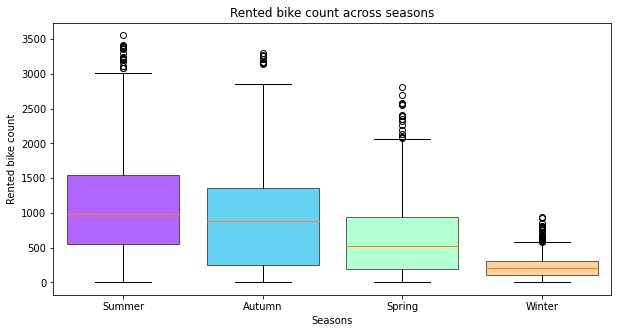

In [62]:
import matplotlib.cm as cm

fig, ax2 = plt.subplots(figsize = (10,5))
box = ax2.boxplot(season_count,  patch_artist = True, widths = (0.8, 0.8, 0.8, 0.8))
ax2.set_xlabel('Seasons')
ax2.set_ylabel('Rented bike count')
ax2.set_title('Rented bike count across seasons')
ax2.set_xticklabels(['Summer', 'Autumn','Spring', 'Winter'])

cm = plt.cm.get_cmap('rainbow')
colors = [cm(val/(season_count.shape[1])) for val in range((season_count.shape[1]))]

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
    
plt.show()

The boxplot across different seasons shows that rental bike use is less important during winter, and higher in summer. Weather has a very predominant effect on rental bike use.

## Rented bike count accross holidays

In [71]:
df_holiday = df[['Holiday', 'Rented Bike Count']].set_index('Holiday')
# df_holiday.head()

In [12]:
Rental_Holiday = df_holiday.loc[['Holiday']]
Rental_Noholiday = df_holiday.loc[['No Holiday']]
holiday_count = ([Rental_Holiday['Rented Bike Count'], Rental_Noholiday['Rented Bike Count']])

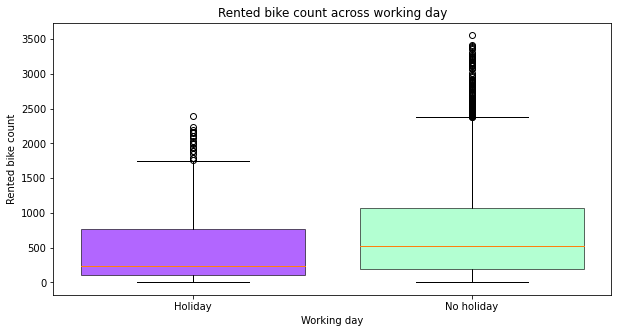

In [61]:
fig, ax3 = plt.subplots(figsize = (10,5))
box = ax3.boxplot(holiday_count ,  patch_artist = True, widths = (0.8, 0.8))
ax3.set_xlabel('Working day')
ax3.set_ylabel('Rented bike count')
ax3.set_title('Rented bike count across working day')
ax3.set_xticklabels(['Holiday', 'No holiday'])

cm = plt.cm.get_cmap('rainbow')
colors = [cm(val/len(holiday_count)) for val in range((len(holiday_count)))]

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

plt.show()

The rental bike use is higher during “No Holiday” period. It implies the working day’s influence on the rental bike usage. This might be explained by people using rental bike services to commute.

## Rented bike count accross days of the week

In [69]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Weekday'] = df[['Date']].apply(lambda x: dt.datetime.strftime(x['Date'], '%A'), axis=1)

In [70]:
df_weekday = df[['Weekday', 'Rented Bike Count']].set_index('Weekday')
# df_weekday.head()

In [16]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_count = pd.DataFrame(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], index = range(1500))

In [17]:
for name in day_names:
    weekday_count[name] = df_weekday.loc[[name]].reset_index(drop = True)
weekday_count = weekday_count.dropna()

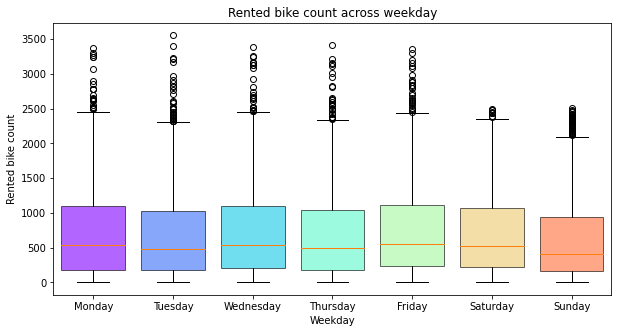

In [60]:
fig, ax4 = plt.subplots(figsize = (10,5))
box = ax4.boxplot(weekday_count,  patch_artist = True, widths = (0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8))
ax4.set_xlabel('Weekday')
ax4.set_ylabel('Rented bike count')
ax4.set_title('Rented bike count across weekday')
ax4.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

cm = plt.cm.get_cmap('rainbow')
colors = [cm(val/weekday_count.shape[1]) for val in range(weekday_count.shape[1])]

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

plt.show()

The boxplot across day of the week represents the rental bike count is slightly higher during the weekdays.

## Rented bike count per hour

In [72]:
df_hours = df[['Date', 'Hour', 'Rented Bike Count']]
df_hours = df_hours.sort_values('Hour')
# df_hours.head()

In [67]:
df_hours = df_hours.pivot(index = 'Date', columns = 'Hour', values = 'Rented Bike Count')
# df_hours.head()

In [63]:
hours_count = df_hours.reset_index(drop = True)
# hours_count.head()

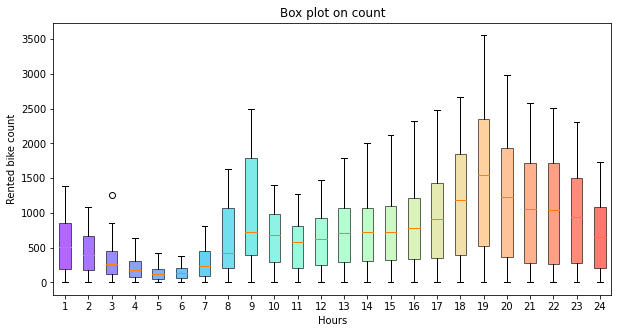

In [59]:
fig, ax5 = plt.subplots(figsize = (10,5))
box = ax5.boxplot(hours_count, patch_artist = True)
ax5.set_xlabel('Hours')
ax5.set_ylabel('Rented bike count')
ax5.set_title('Box plot on count')

cm = plt.cm.get_cmap('rainbow')
colors = [cm(val/hours_count.shape[1]) for val in range(hours_count.shape[1])]

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

plt.show()

The boxplot across hours of the day represents the relationship between rental bike count and time. Rental bike usage is high at peak hours which is consistent with the assumption that people rental bike services to commute. 
With the different boxplots displayed, it’s evident that rental bike had high time and weather component.

The next notebook will be focused highlighting the features importance and work on prediction.

## Reference 

[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020

[2] Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020